<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2025/blob/main/esame_30.6/Soluzione_di_MetodiAIFisica_ApplicazioniFisicheML_2025_ProvaPratica_30_6_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova Pratica - Metodi AI per la fisica e Applicazioni Fisiche al ML
### 30.6.2026 - AA 2024/25 - Docenti: S. Giagu e A. Ciardiello

---

**Regole:**

*   **tempo a disposizione:** 3.0h

*   compilare con i vostri dati i campi della cella che segue e poi eseguire la cella verificando che i dati printati corrispondano. L'esecuzione della cella scarica contesualmente il dataset da utilizzare durante la prova;
*   risolvere i quesiti/compiti indicati nella cella *Descrizione del compito*.
*   una volta completato il compito scaricare il notebook in formato *.ipynb* e caricarlo usando il form:
[consegna notebook](https://docs.google.com/forms/d/e/1FAIpQLSekkv2tTVIIAyY15lc3a4px_yjxoQJ6INr6CuWiXNw1GccJoQ/viewform?usp=dialog)<p>


**NOTA 1:** per scaricare localmente il notebook da colab: menù **File->Dowload->Download .ipynb** (non è necessario cambiare il nome del file, il form associa automaticamnte il vostro nome / email al file che caricate)
<p>

**NOTA 2:** una volta caricato e sottomesso il notebook non sono più possibili ulteriori modifiche.

In [ ]:
#@ Dati Personali
import os

Nome = 'Stefano'  #@param {type: "string"}
Cognome = 'Giagu' #@param {type: "string"}
NumeroMatricola = 123123 #@param {type: "number"}

if NumeroMatricola == 12345678:
  print('\033[1;31m Inserisci il numero di matricola corretto!!!!')
else:
  print('Download datasets ...')
  !wget http://giagu.web.cern.ch/giagu/CERN/gml_images.npz
  !ls
  print('Done')

Download datasets ...
--2025-07-07 06:04:04--  http://giagu.web.cern.ch/giagu/CERN/gml_images.npz
Resolving giagu.web.cern.ch (giagu.web.cern.ch)... 188.185.50.104, 137.138.55.232, 188.185.5.88, ...
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.185.50.104|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://giagu.web.cern.ch/giagu/CERN/gml_images.npz [following]
--2025-07-07 06:04:04--  https://giagu.web.cern.ch/giagu/CERN/gml_images.npz
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.185.50.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304133499 (290M)
Saving to: ‘gml_images.npz’

gml_images.npz      100%[===================>] 290.04M  17.3MB/s    in 19s     

2025-07-07 06:04:24 (15.1 MB/s) - ‘gml_images.npz’ saved [304133499/304133499]

gml_images.npz	sample_data
Done


# Descrizione del compito:

Viene fornito un dataset in formato numpy compresso *gml_images.npz*, che contiene due array numpy:

*   images: 20000 esempi di immagini di shape $(64,64)$;
*   targets: 20000 target associati $y\in R^1$.


---

**Svolgere i seguenti quesiti:**

1. (Q0): leggere i due array e graficare 5 immagini con i target associati, formattati in una matrice di 3x3 plot
2. (Q1): **allenare** un modello basato su architettura CNN che predica il target associato a ciascuna immagine, e stimarne le prestazioni nel modo che si ritiene più opporuno;
3. (Q2): **allenare** lo stesso modello usato in Q1 (**stessi numero di pesi e architettura**), modificato per avere tutte le **attivazioni di tipo lineare**;
4. (Q3): **allenare** la stessa architettura usata in Q1, (**utilizzando lo stesso numero di epoche utilizzate nel punto Q1**), modificata in modo da avere tutte le **attivazioni di tipo sigmoide**;
5. (Q4): **allenare** la stessa architettura usata in Q1, ma inizializzando tutti i **pesi e i bias della rete al valore iniziale zero ($0.0$)**;
5. (Q5): spiegare le differenze incontrate nelle quattro configurazioni Q1, Q2, Q3 e Q4.

* commentare opportunamente i risultati ottenuti in ogni punto.

### **Criteri di Valutazione del compito** ###

I seguenti punti sono valutati per ciascuna consegna:

1. Strategia di normalizzazione: I dati in input devono essere correttamente normalizzati (ad esempio, con min-max o z-score). L’uso di metodi non validi, come la divisione per 255 (**NON si tratta di un’immagine uint8!**), oppure l’omissione totale della normalizzazione, è considerato scorretto. I dati originali hanno un intervallo che va da -1e2 a +1e2, con molti outlier. Nella soluzione, gli outlier sono stati rimossi tramite clamp, ma questo passaggio non era richiesto. Si noti che gli outlier possono influire sulla normalizzazione (sia max-scaling sia z-score sono sensibili ad essi).

2. Progettazione del modello nella Q1: La CNN utilizzata nella Q1 deve essere appropriata al compito, idealmente leggera (es. meno di ~1 milione di parametri) e non inutilmente complessa. Si è scoraggiato l’uso di layer lineari molto grandi in assenza di tecniche di regolarizzazione.

3. Procedura di training nella Q1: Il modello deve essere correttamente addestrato, con segni evidenti di convergenza. Poiché il compito era discutere la convergenza, dovevano essere utilizzati un numero adeguato di epoche e meccanismi come early stopping per selezionare i parametri con cui testare (es. controlli sulla validazione o salvataggi intermedi/checkpoint).

4. Valutazione delle prestazioni: Lo studente deve utilizzare metriche appropriate per un compito di regressione (es. coefficiente R², grafici dei residui) per valutare le prestazioni del modello.

5. Loss function: La funzione di perdita scelta deve essere adeguata per un problema di regressione (es. MSE o MAE o HuberLoss).

6. Scelte dei valori degli iperparametri: I valori degli iperparametri, come il learning rate, devono essere ragionevoli. Ad esempio, un learning rate troppo piccolo senza giustificazione può compromettere l’addestramento o renderlo lensitissimo.

7. Funzioni di attivazione nella Q2: Il modello nella Q2 deve utilizzare esclusivamente funzioni di attivazione lineari, come specificato.

8. Funzioni di attivazione nella Q3: Il modello nella Q3 deve utilizzare solo attivazioni sigmoidali.

9. Inizializzazione a zero nella Q4: Il modello nella Q4 deve essere inizializzato con tutti i pesi posti a zero. In molti elaborati consegnati, il modello è stato reinizializzato dopo la fase di inizializzazione dei pesi a zero vanificando l'operazione.

10. Qualità del codice: Il codice deve essere leggibile, ben commentato e strutturato in modo chiaro.

11. Spiegazione nella Q5: Lo studente deve discutere esplicitamente le differenze osservate tra Q1 e Q4, in particolare per quanto riguarda il comportamento del modello e la convergenza.

Q1/Q2: Il modello in Q1 può andare in overfitting. Le migliori prestazioni ottenute in Q1 costituiscono il baseline. Il modello in Q2 ha lo stesso numero di parametri ma non va in overfitting nello stesso modo (può apprendere solo funzioni lineari, capacità reale inferiore) e le sue prestazioni migliori sono sensibilmente inferiori a quelle della Q1.

Q1/Q3: A parità di learning rate, la convergenza (cioè il numero di epoche necessarie per raggiungere la soluzione) è più lenta per Q3 (servono più epoche per raggiungere lo stesso punto). Le prestazioni sono paragonabili a quelle della Q1 (se si utilizzano abbastanza epoche).

12. Discussione teorica nella Q2: Lo studente deve affermare che un modello che utilizza solo attivazioni lineari non può apprendere funzioni non lineari. Questo punto deve essere presente, altrimenti la risposta è considerata errata. Dire che le funzioni lineari sono più veloci da calcolare rispetto alle ReLU è considerato non sufficiente (non è tecnicamente falso, ma è irrilevante e non pertinente al problema).

13. Discussione teorica nella Q3: Lo studente deve riconoscere che la convergenza (in termini di numero di epoche, non di tempo per singola epoca) con attivazioni sigmoidali è più lenta quando si usa un learning rate fisso. Questo è dovuto principalmente al problema del vanishing gradient.

14. Discussione teorica nella Q4: Lo studente deve spiegare che le reti inizializzate a zero non riescono ad addestrarsi a causa di problemi di simmetria. Rifiutarsi di addestrare la rete, dichiarando che sarebbe stato inutile, è stato considerato un comportamento corretto e premiato.

Images shape: (20000, 64, 64)
Targets shape: (20000, 1)


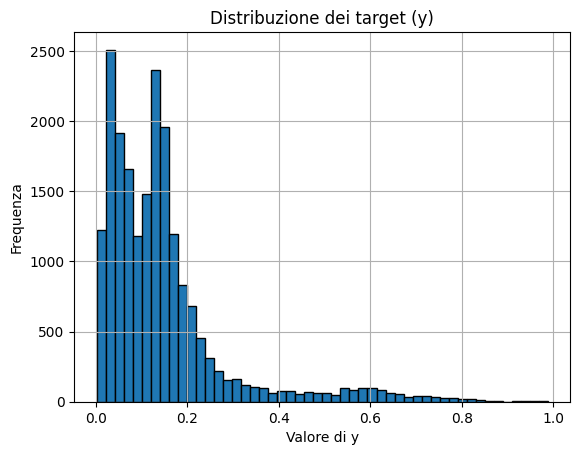

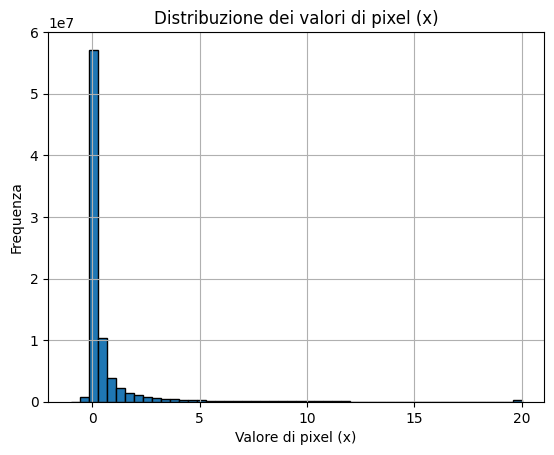

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load('gml_images.npz')

# Estrae gli array
images = data['images']     # shape: (20000, 64, 64)
targets = data['targets']   # shape: (20000,)
targets /=4
targets= targets.reshape(-1,1)
#clamp images
images = (np.clip(images, -1, 20))


#images = np.log(images+1)
# Verifica shapes
print(f"Images shape: {images.shape}")
print(f"Targets shape: {targets.shape}")

# Istogramma dei valori target
plt.hist(targets, bins=50, edgecolor='black')
plt.title('Distribuzione dei target (y)')
plt.xlabel('Valore di y')
plt.ylabel('Frequenza')
plt.grid(True)
plt.show()

#istogramma images
plt.hist(images.flatten(), bins=50, edgecolor='black')
plt.title('Distribuzione dei valori di pixel (x)')
plt.xlabel('Valore di pixel (x)')
plt.ylabel('Frequenza')
plt.grid(True)

Text(0, 0.5, 'Valore target')

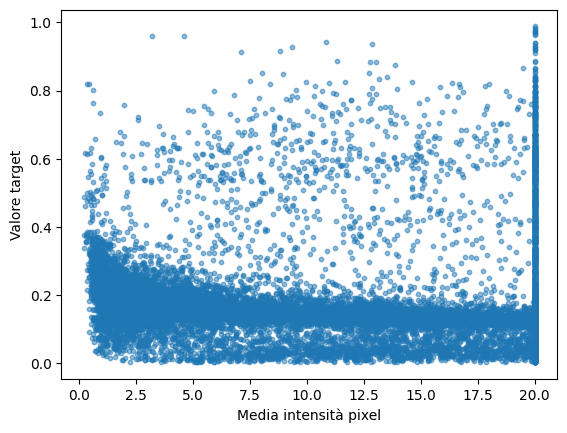

In [ ]:
#scatter average intensity, target
plt.scatter(np.max(images, axis=(1,2)), targets, alpha=0.5, s=10)
plt.xlabel("Media intensità pixel")
plt.ylabel("Valore target")

In [ ]:
from sklearn.model_selection import train_test_split

images_flat = images.reshape(images.shape[0], -1)

# Primo split: train (70%) vs temp (30%)
X_train_flat, X_temp_flat, y_train, y_temp = train_test_split(
    images_flat, targets, test_size=0.30, random_state=42
)

# Secondo split: val (15%) vs test (15%) = 50% e 50% di X_temp
X_val_flat, X_test_flat, y_val, y_test = train_test_split(
    X_temp_flat, y_temp, test_size=0.50, random_state=42
)


# Verifica delle proporzioni
print(f"Train set: {X_train_flat.shape[0]} samples")
print(f"Validation set: {X_val_flat.shape[0]} samples")
print(f"Test set: {X_test_flat.shape[0]} samples")

from sklearn.preprocessing import StandardScaler
# Standardizzazione immagini
image_scaler = StandardScaler()
X_train_scaled = image_scaler.fit_transform(X_train_flat)
X_val_scaled = image_scaler.transform(X_val_flat)
X_test_scaled = image_scaler.transform(X_test_flat)

# Standardizzazione target
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train)
y_val_scaled = target_scaler.transform(y_val)
y_test_scaled = target_scaler.transform(y_test)

#
X_train_cnn = X_train_scaled.reshape(-1, 1, 64, 64)
X_val_cnn = X_val_scaled.reshape(-1, 1, 64, 64)
X_test_cnn = X_test_scaled.reshape(-1, 1, 64, 64)

# Verifica shapes
print(f"Train: {X_train_cnn.shape}, {y_train_scaled.shape}")
print(f"Val:   {X_val_cnn.shape}, {y_val_scaled.shape}")
print(f"Test:  {X_test_cnn.shape}, {y_test_scaled.shape}")

Train set: 14000 samples
Validation set: 3000 samples
Test set: 3000 samples
Train: (14000, 1, 64, 64), (14000, 1)
Val:   (3000, 1, 64, 64), (3000, 1)
Test:  (3000, 1, 64, 64), (3000, 1)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, output_dim, act="relu"):
        super(SimpleCNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)   # (B, 1, 64, 64) → (B, 16, 64, 64)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # (B, 32, 32, 32)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # Halves H and W

        # Activation
        if act == "relu":
            self.act = nn.ReLU()
        elif act == "sigmoid":
            self.act = nn.Sigmoid()
        elif act == "linear":
            self.act = nn.Identity()
        else:
            raise ValueError("Invalid activation function")

        # Fully connected layer
        self.fc = nn.Linear(64 * 4 * 4, output_dim)  # After 3 poolings: 64x64 → 8x8 → 4x4

    def forward(self, x):
        x = self.pool(self.act(self.conv1(x)))  # (B, 16, 32, 32)
        x = self.pool(self.act(self.conv2(x)))  # (B, 32, 16, 16)
        x = self.pool(self.act(self.conv3(x)))  # (B, 64, 8, 8)
        x = self.pool(self.act(self.conv4(x)))
        x = x.view(x.size(0), -1)               # Flatten
        x = self.fc(x)
        return x




In [ ]:
# Dataset e Dataloader
from torch.utils.data import TensorDataset, DataLoader
batch_size = 256
train_loader = DataLoader(TensorDataset(torch.tensor(X_train_cnn).float(), torch.tensor(y_train_scaled).float()), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(torch.tensor(X_val_cnn).float(), torch.tensor(y_val_scaled).float()), batch_size=batch_size)


In [ ]:
#


def train_model(model, train_loader, val_loader, epochs=20):
  criterion = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

  # Training loop con checkpoint

  train_losses = []
  val_losses = []
  best_val_loss = float('inf')
  best_model_path = "best_model.pt"

  for epoch in range(epochs):
      model.train()
      running_loss = 0.0
      for xb, yb in train_loader:
          xb, yb = xb.to("cuda"), yb.to("cuda")

          optimizer.zero_grad()
          pred = model(xb)
          loss = criterion(pred, yb)
          loss.backward()
          optimizer.step()
          running_loss += loss.item() * xb.size(0)
      train_loss = running_loss / len(train_loader.dataset)

      model.eval()
      with torch.no_grad():
          val_loss = sum(criterion(model(xb.to("cuda")), yb.to("cuda")).item() * xb.size(0)
                        for xb, yb in val_loader) / len(val_loader.dataset)

      train_losses.append(train_loss)
      val_losses.append(val_loss)

      print(f"Epoch {epoch+1:2d}/{epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")

      if val_loss < best_val_loss:
          best_val_loss = val_loss
          torch.save(model.state_dict(), best_model_path)
          print("Model saved!")

  # Carica miglior modello
  model.load_state_dict(torch.load(best_model_path))
  return model, train_losses, val_losses

# Plot train/val loss
def plot_losses(train_losses, val_losses,title="relu"):
  plt.plot(train_losses, label='Train Loss')
  plt.plot(val_losses, label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE Loss')
  plt.legend()
  plt.title(f'Training and Validation Loss - {title}')
  plt.grid(True)
  plt.show()

In [ ]:
from sklearn.metrics import r2_score

def evaluate_model(model, X_test_cnn):
  model.load_state_dict(torch.load("best_model.pt"))
  model.eval()

  # Predizioni su test set
  X_test_t = torch.tensor(X_test_cnn).to("cuda")
  with torch.no_grad():
      y_pred_t = model(X_test_t).cpu().numpy()

  y_true = y_test_scaled.flatten()
  y_pred = y_pred_t.flatten()

  # R^2
  r2 = r2_score(y_true, y_pred)
  print(f"R² (test set): {r2:.4f}")

  # Scatter plot predetto vs vero
  plt.figure(figsize=(6,6))
  plt.scatter(y_true, y_pred, alpha=0.5, s=10)
  mx = np.max([y_true.max(), y_pred.max()])
  mn = np.min([y_true.min(), y_pred.min()])
  plt.plot([mn, mx], [mn, mx], 'r--')
  plt.xlabel("Valore vero")
  plt.ylabel("Valore predetto")
  plt.title("Predetto vs. Vero")
  plt.grid(True)
  plt.show()

  # Istogramma dei residui
  residuals = y_true - y_pred
  plt.figure(figsize=(6,4))
  plt.hist(residuals, bins=50, edgecolor='black')
  plt.xlabel("Residui (y_true - y_pred)")
  plt.ylabel("Frequenza")
  plt.title("Distribuzione dei residui")
  plt.grid(True)
  plt.show()
  return r2, residuals.mean()

In [ ]:
def zero_weights(model):
    for module in model.modules():
        if isinstance(module, (nn.Linear, nn.Conv2d)):
            if module.weight is not None:
                nn.init.constant_(module.weight, 0.0)
            if module.bias is not None:
                nn.init.constant_(module.bias, 0.0)

Epoch  1/50 - Train Loss: 0.6936 - Val Loss: 0.5158
Model saved!
Epoch  2/50 - Train Loss: 0.5072 - Val Loss: 0.3949
Model saved!
Epoch  3/50 - Train Loss: 0.3949 - Val Loss: 0.3526
Model saved!
Epoch  4/50 - Train Loss: 0.3558 - Val Loss: 0.3347
Model saved!
Epoch  5/50 - Train Loss: 0.3398 - Val Loss: 0.3113
Model saved!
Epoch  6/50 - Train Loss: 0.3189 - Val Loss: 0.3367
Epoch  7/50 - Train Loss: 0.3111 - Val Loss: 0.2977
Model saved!
Epoch  8/50 - Train Loss: 0.3161 - Val Loss: 0.3120
Epoch  9/50 - Train Loss: 0.3088 - Val Loss: 0.3247
Epoch 10/50 - Train Loss: 0.2995 - Val Loss: 0.2967
Model saved!
Epoch 11/50 - Train Loss: 0.2967 - Val Loss: 0.3228
Epoch 12/50 - Train Loss: 0.2855 - Val Loss: 0.2951
Model saved!
Epoch 13/50 - Train Loss: 0.2827 - Val Loss: 0.2984
Epoch 14/50 - Train Loss: 0.2858 - Val Loss: 0.2981
Epoch 15/50 - Train Loss: 0.2901 - Val Loss: 0.2891
Model saved!
Epoch 16/50 - Train Loss: 0.2848 - Val Loss: 0.2799
Model saved!
Epoch 17/50 - Train Loss: 0.2796 - Val

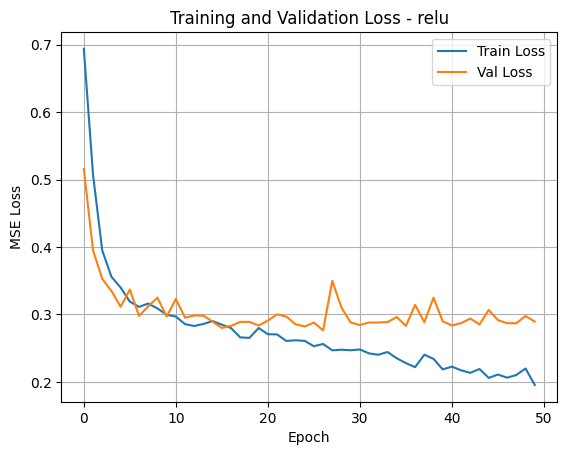

R² (test set): 0.7252


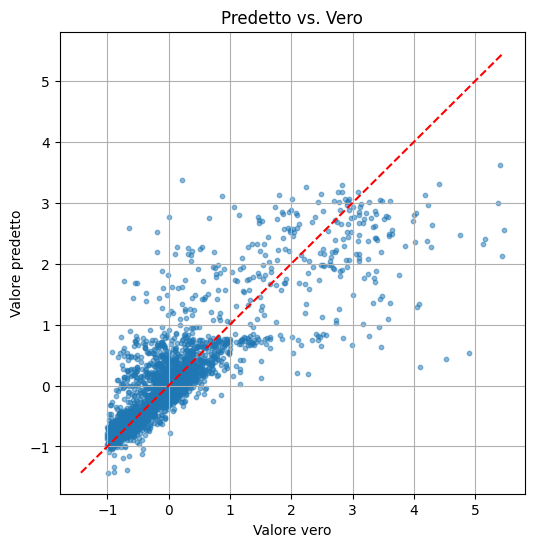

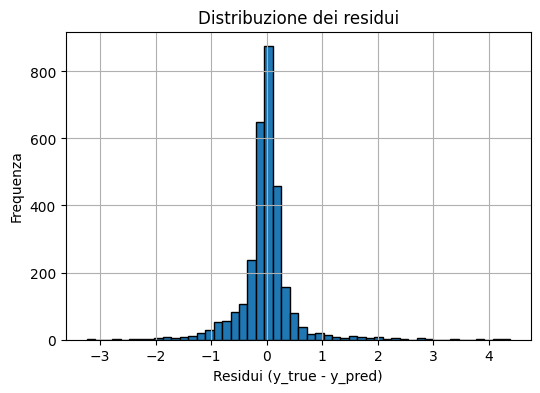

Epoch  1/50 - Train Loss: 0.7402 - Val Loss: 0.5666
Model saved!
Epoch  2/50 - Train Loss: 0.5762 - Val Loss: 0.4653
Model saved!
Epoch  3/50 - Train Loss: 0.5010 - Val Loss: 0.5284
Epoch  4/50 - Train Loss: 0.4847 - Val Loss: 0.4162
Model saved!
Epoch  5/50 - Train Loss: 0.4167 - Val Loss: 0.4731
Epoch  6/50 - Train Loss: 0.4089 - Val Loss: 0.4103
Model saved!
Epoch  7/50 - Train Loss: 0.3871 - Val Loss: 0.4054
Model saved!
Epoch  8/50 - Train Loss: 0.3928 - Val Loss: 0.3743
Model saved!
Epoch  9/50 - Train Loss: 0.3908 - Val Loss: 0.4231
Epoch 10/50 - Train Loss: 0.3781 - Val Loss: 0.3858
Epoch 11/50 - Train Loss: 0.3561 - Val Loss: 0.3867
Epoch 12/50 - Train Loss: 0.3522 - Val Loss: 0.3695
Model saved!
Epoch 13/50 - Train Loss: 0.3502 - Val Loss: 0.3732
Epoch 14/50 - Train Loss: 0.3477 - Val Loss: 0.3664
Model saved!
Epoch 15/50 - Train Loss: 0.3481 - Val Loss: 0.3831
Epoch 16/50 - Train Loss: 0.3342 - Val Loss: 0.4037
Epoch 17/50 - Train Loss: 0.3431 - Val Loss: 0.3875
Epoch 18/50 

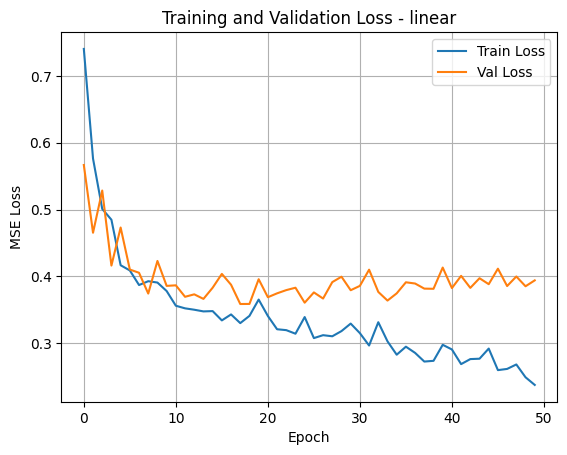

R² (test set): 0.6336


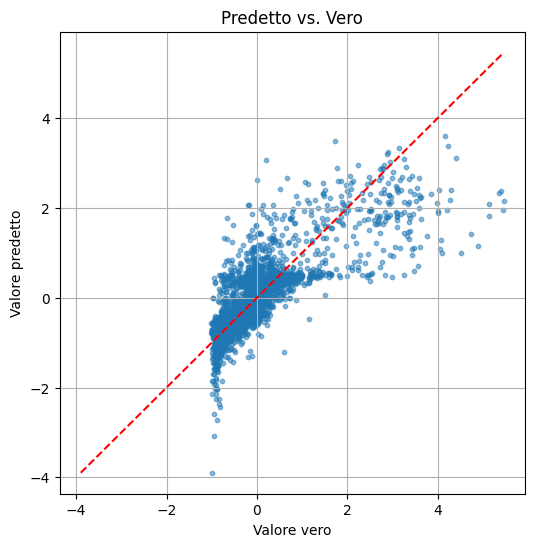

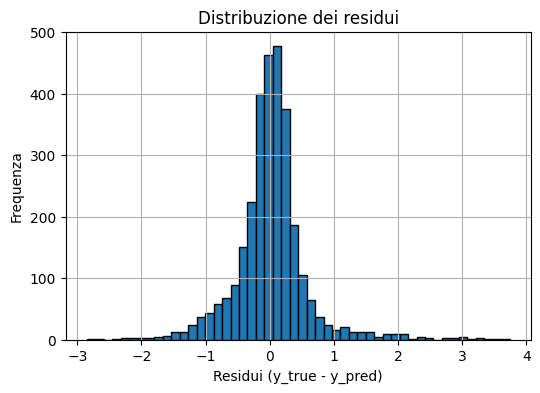

Epoch  1/50 - Train Loss: 1.0286 - Val Loss: 0.9227
Model saved!
Epoch  2/50 - Train Loss: 0.8162 - Val Loss: 0.5896
Model saved!
Epoch  3/50 - Train Loss: 0.6405 - Val Loss: 0.5932
Epoch  4/50 - Train Loss: 0.6236 - Val Loss: 0.5608
Model saved!
Epoch  5/50 - Train Loss: 0.6025 - Val Loss: 0.5342
Model saved!
Epoch  6/50 - Train Loss: 0.5656 - Val Loss: 0.4977
Model saved!
Epoch  7/50 - Train Loss: 0.5307 - Val Loss: 0.4974
Model saved!
Epoch  8/50 - Train Loss: 0.5278 - Val Loss: 0.4570
Model saved!
Epoch  9/50 - Train Loss: 0.4915 - Val Loss: 0.4474
Model saved!
Epoch 10/50 - Train Loss: 0.4837 - Val Loss: 0.4790
Epoch 11/50 - Train Loss: 0.4745 - Val Loss: 0.4339
Model saved!
Epoch 12/50 - Train Loss: 0.4677 - Val Loss: 0.4408
Epoch 13/50 - Train Loss: 0.4629 - Val Loss: 0.4380
Epoch 14/50 - Train Loss: 0.4562 - Val Loss: 0.4209
Model saved!
Epoch 15/50 - Train Loss: 0.4564 - Val Loss: 0.4278
Epoch 16/50 - Train Loss: 0.4460 - Val Loss: 0.4139
Model saved!
Epoch 17/50 - Train Loss:

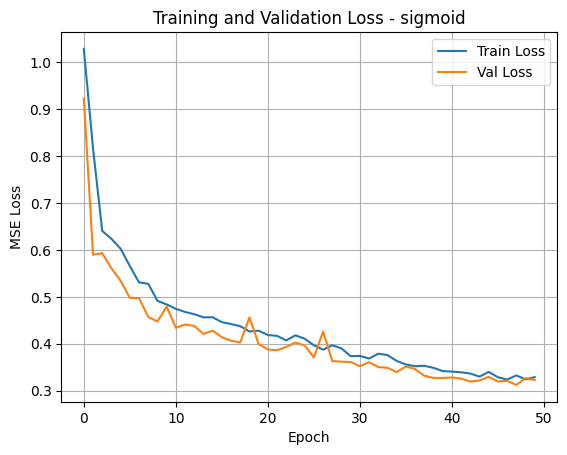

R² (test set): 0.6897


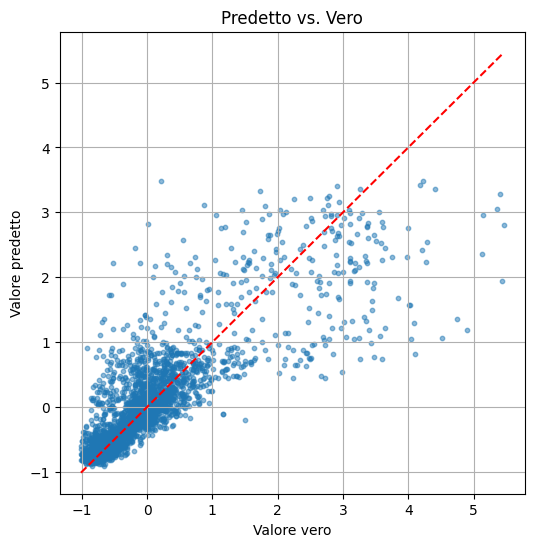

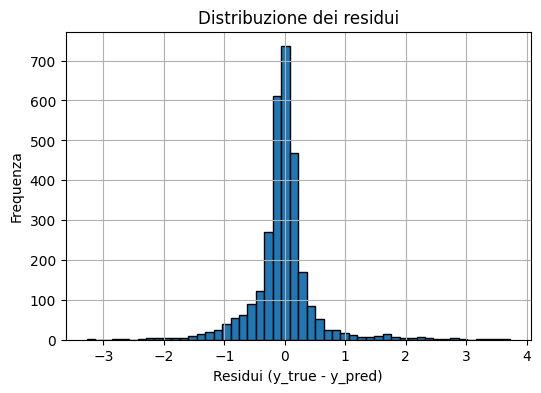

Epoch  1/50 - Train Loss: 1.0001 - Val Loss: 0.9322
Model saved!
Epoch  2/50 - Train Loss: 1.0000 - Val Loss: 0.9323
Epoch  3/50 - Train Loss: 1.0000 - Val Loss: 0.9322
Epoch  4/50 - Train Loss: 1.0000 - Val Loss: 0.9322
Epoch  5/50 - Train Loss: 1.0000 - Val Loss: 0.9322
Epoch  6/50 - Train Loss: 1.0001 - Val Loss: 0.9322
Epoch  7/50 - Train Loss: 1.0001 - Val Loss: 0.9322
Epoch  8/50 - Train Loss: 1.0000 - Val Loss: 0.9322
Epoch  9/50 - Train Loss: 1.0000 - Val Loss: 0.9322
Epoch 10/50 - Train Loss: 1.0001 - Val Loss: 0.9322
Epoch 11/50 - Train Loss: 1.0001 - Val Loss: 0.9324
Epoch 12/50 - Train Loss: 1.0000 - Val Loss: 0.9323
Epoch 13/50 - Train Loss: 1.0000 - Val Loss: 0.9322
Model saved!
Epoch 14/50 - Train Loss: 1.0000 - Val Loss: 0.9323
Epoch 15/50 - Train Loss: 1.0001 - Val Loss: 0.9323
Epoch 16/50 - Train Loss: 1.0000 - Val Loss: 0.9323
Epoch 17/50 - Train Loss: 1.0000 - Val Loss: 0.9323
Epoch 18/50 - Train Loss: 1.0000 - Val Loss: 0.9323
Epoch 19/50 - Train Loss: 1.0000 - Val

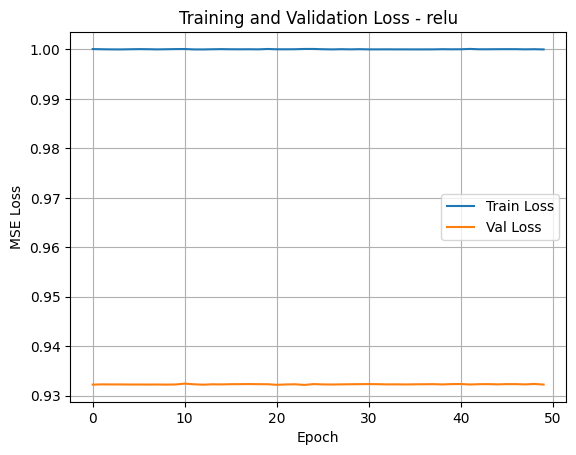

R² (test set): -0.0006


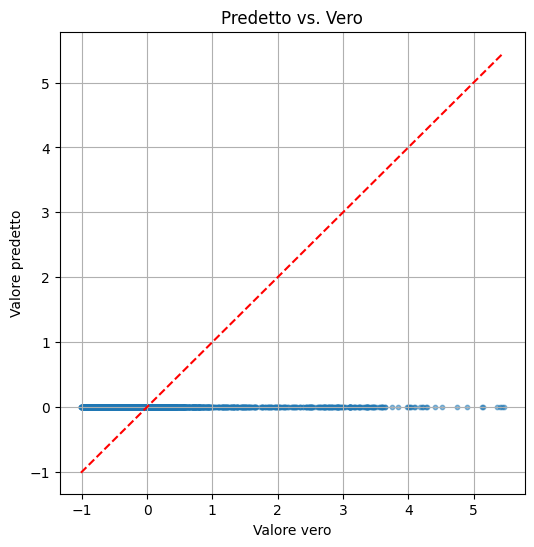

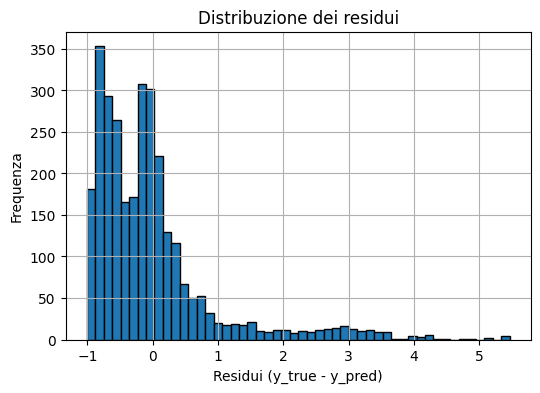

In [ ]:
# train and compare RELU
model_relu = SimpleCNN(output_dim=1, act="relu").to("cuda")
model_relu, train_losses_relu, val_losses_relu = train_model(model_relu, train_loader, val_loader, epochs=50)
plot_losses(train_losses_relu, val_losses_relu, title="relu")
r2_relu, res_avg_relu = evaluate_model(model_relu, X_test_cnn)

#linear
model_linear = SimpleCNN(output_dim=1, act="linear").to("cuda")
model_linear, train_losses_linear, val_losses_linear = train_model(model_linear, train_loader, val_loader, epochs=50)
plot_losses(train_losses_linear, val_losses_linear, title="linear")
r2_linear, res_avg_linear = evaluate_model(model_linear, X_test_cnn)

#sigmoid
model_sigmoid = SimpleCNN(output_dim=1, act="sigmoid").to("cuda")
model_sigmoid, train_losses_sigmoid, val_losses_sigmoid = train_model(model_sigmoid, train_loader, val_loader, epochs=50)
plot_losses(train_losses_sigmoid, val_losses_sigmoid, title="sigmoid")
r2_sigmoid, res_avg_sigmoid = evaluate_model(model_sigmoid, X_test_cnn)

#zero
# train and compare initialize at zero
model_zero = SimpleCNN(output_dim=1, act="relu").to("cuda")
zero_weights(model_zero)
model_zero, train_losses_zero, val_losses_zero = train_model(model_zero, train_loader, val_loader, epochs=50)
plot_losses(train_losses_zero, val_losses_zero, title="relu")
r2_zero, res_avg_zero = evaluate_model(model_zero, X_test_cnn)


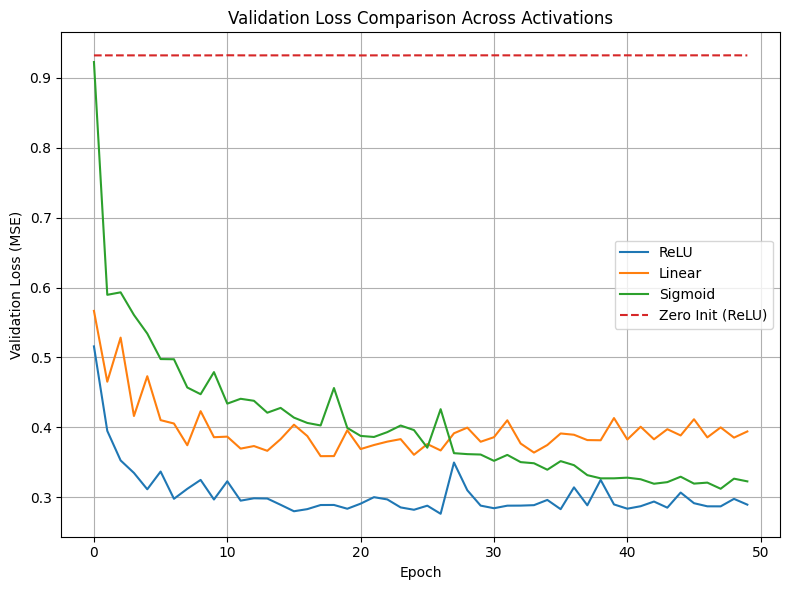

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(val_losses_relu[:], label='ReLU')
plt.plot(val_losses_linear[:], label='Linear')
plt.plot(val_losses_sigmoid[:], label='Sigmoid')
plt.plot(val_losses_zero[:], label='Zero Init (ReLU)', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss (MSE)')
plt.title('Validation Loss Comparison Across Activations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

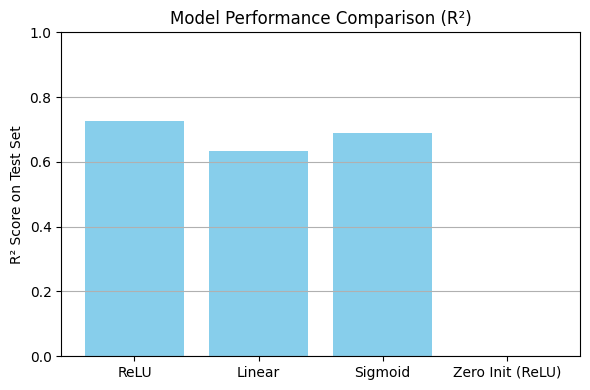

In [ ]:
r2_scores = {
    'ReLU': r2_relu,
    'Linear': r2_linear,
    'Sigmoid': r2_sigmoid,
    'Zero Init (ReLU)': r2_zero
}

plt.figure(figsize=(6,4))
plt.bar(r2_scores.keys(), r2_scores.values(), color='skyblue')
plt.ylabel('R² Score on Test Set')
plt.title('Model Performance Comparison (R²)')
plt.ylim(0, 1)  # Adjust depending on your range
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Q5: per i punti e commenti da riportare vedere la discussione iniziale su "Criteri di valutazione del compito"